# Transfer Learning

In [2]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Flatten
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
#pip install opencv-python

Cifar10 datasetini içe aktaralım ve train ve test olarak ayıralım. Cifar dataseti 10 sınıflı resimlerden oluşan bir dataset

In [4]:
(x_train,y_train),(x_test,y_test) =cifar10.load_data()
print("x train shape ", x_train.shape)
print("Train sample ", x_train.shape[0])

170498071/170498071 [==============================] - 16s 0us/step
x train shape  (50000, 32, 32, 3)
Train sample  50000


Class sayımızı 10.

In [5]:
numberOfClass= 10

x_train ve y_train verilerini to_categorical methodu ile categorical veriye çeviriyoruz.

In [7]:
y_train= to_categorical(y_train, numberOfClass)
y_train= to_categorical(y_test, numberOfClass)


Shape elde edeilmek için 1: itibaren kısımı alıyoruz.

In [9]:
input_shape= x_train.shape[1:]

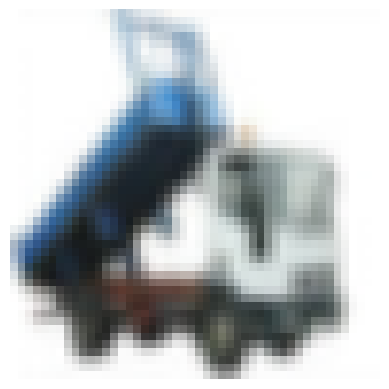

In [24]:
plt.imshow(x_train[5511].astype(np.uint))
plt.axis("off")
plt.show()

İnputların boyutlarını ayarlamamız gerekiyor. Bu sebeple de resize_img methodu ile bunu sağlamak gerkiyor. 

Önce img.shape[0] ile resim sayısını öğreniyoruz.

Ardından memory_allocation ile bir bellekten yer ayırıyoruz. 48x48 lik boyutlar ve 3 kanallı ayrıca da iamge sayısı kadar 0 lardan oluşan bir np.array'dir.

for döngüsü ile tek tek image'leri dolaşacağım ve tek tek boyutları ayarlayacağım. 

In [18]:
#Datasetimizide image'lerin 48x48 lik resimler haline getirmek gerekiyor 
#increase dimension
def resize_img(img):
    numberOfImage= img.shape[0] 
    new_array= np.zeros((numberOfImage, 48,48,3))
    for i in range(numberOfImage):
        new_array[i]= cv2.resize(img[i,:,:,:],(48,48))
    return new_array
    

Resim boyutları kullanacağımız model için küçük olduğu için resim boyutlarını ayarlayacağız.

In [19]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)
print("increased dim x_train: ",x_train)


increased dim x_train:  [[[[ 59.  62.  63.]
   [ 51.  54.  54.]
   [ 44.  46.  44.]
   ...
   [153. 126. 103.]
   [150. 124. 102.]
   [148. 124. 103.]]

  [[ 38.  41.  42.]
   [ 30.  32.  32.]
   [ 23.  24.  22.]
   ...
   [136. 105.  77.]
   [135. 105.  78.]
   [135. 106.  80.]]

  [[ 17.  20.  20.]
   [ 10.  11.  10.]
   [  6.   3.   0.]
   ...
   [119.  84.  51.]
   [119.  84.  52.]
   [120.  85.  54.]]

  ...

  [[185. 144.  96.]
   [181. 136.  68.]
   [179. 131.  39.]
   ...
   [105.  71.  39.]
   [ 84.  53.  30.]
   [ 78.  50.  32.]]

  [[179. 142. 106.]
   [175. 134.  87.]
   [172. 129.  66.]
   ...
   [136. 102.  68.]
   [114.  81.  56.]
   [103.  73.  53.]]

  [[177. 144. 116.]
   [172. 136. 105.]
   [170. 131.  93.]
   ...
   [162. 129.  93.]
   [137. 105.  78.]
   [123.  92.  72.]]]


 [[[154. 177. 187.]
   [140. 157. 161.]
   [122. 131. 129.]
   ...
   [ 88.  91.  71.]
   [ 83.  85.  70.]
   [ 79.  81.  70.]]

  [[147. 169. 178.]
   [141. 157. 162.]
   [132. 140. 139.]
   .

Resmin nasıl değiştiğini bir görelim.

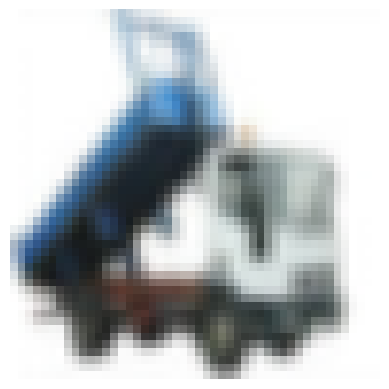

In [25]:
plt.figure()
plt.imshow(x_train[5511].astype(np.uint8))
plt.axis("off")
plt.show()

Modeli kullanmaya başlayabiliriz. Trasnfer Learning'in önemli örneklerinden biri de VGG19. Modeli indirdik ve modelin bazı parametrelerini ayarlayacağız. İlk olarak include_top= False olması maxPooling2d'ye kadar kısmı alıyor.Yani aslında fullyconnected kısmını kullanacağımız için o kısmı atıyoruz. Ardından weight değerleninin alacağımız dataseti "imagenet" veriseti olacağından bunu da belirtiyoruz. Son olarak ad input_shape değerimizi belirtip VGG19 modelini indiriyoruz.

In [ ]:
vgg= VGG19(include_top=False,weights="imagenet",input_shape=(48,48,3))
print(vgg.summary())

Modelimiz Sequential() bir model olacağından önce belirtip ardında VGG19 layer'larını model.add şeklinde ekliyoruz.

In [ ]:
model= Sequential()
for layer in vgg_layer_list:
    model.add(layer)

Modeli görüntülediğimizde maxpooling2d'de bittiğini göreceğiz. Fully connected layer'ı ekleyeceğiz.

In [ ]:
print(model.summary())

Şimdi ise fullyConnected katmanını ekleyelim.

In [ ]:
model.add(Flatten())
model.add(Dense(128)) #128 nöronlu bir dense layer
model.add(Dense(numberOfClass, activation="softmax"))

Artık modeli compile edeceğimiz için loss, optimizer ve metrik değerlerini tanımlayacğız.

In [ ]:
model.compile(loss = "categorical_crossentropy",
              optimizer = "rmsprop",
              metrics = ["accuracy"] )

Modeli kuracağız ve fit edeceğiz.

In [ ]:
hist =model.fit(x_train, y_train, validation_split =0.2, epochs=5, batch_size=1000) 

train datası fit edileceğinden 1. ve 2.parametrelere train datalarını yazdık. Validation kısmı için %20 kısmını alıyoruz. Doğrulama yapmamız gerekiyor. Validation kısmını bunun için kullanıyoruz.

In [ ]:
# model save
model.save_weights("example.h5")

plt.plot(hist.history["loss"], label = "train loss")
plt.plot(hist.history["val_loss"], label = "val loss")
plt.legend()
plt.show()

plt.figure()
plt.plot(hist.history["acc"], label = "train acc")
plt.plot(hist.history["val_acc"], label = "val acc")
plt.legend()
plt.show()

In [ ]:
# load
import json, codecs
with codecs.open("transfer_learning_vgg19_cfar10.json","r",encoding = "utf-8") as f:
    n = json.loads(f.read())

plt.plot(n["acc"], label = "train acc")
plt.plot(n["val_acc"], label = "val acc")
plt.legend()
plt.show()


# save
with open('transfer_learning_vgg19_cfar10.json', 'w') as f:
    json.dump(hist.history, f)